# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



### Not for Grading

## Visual Bag of Words

In [ ]:
#@title Case Study Walkthrough
#@markdown Visual Bag of Words
from IPython.display import HTML

HTML("""<video width="320" height="240" controls>
  <source src="https://cdn.talentsprint.com/talentsprint/archives/sc/aiml/aiml_2018_b7_hyd/preview_videos/visual_bag_of_words.mp4">
</video>
""")

Visual Bag of words is commonly used in image classification. Its concept is adapted from information retrieval and NLP’s bag of words (BoW). In a bag of words (BoW), we count the number of each word appears in a document, use the frequency of each word to know the keywords of the document, and make a frequency histogram from it. We treat a document as a bag of words (BoW). We have the same concept in the bag of Visual Bag of words, but instead of words, we use image features as the “words”. Image features are a unique patterns that we can find in an image. The objective of this experiment is to visualize the implementation of Visual Bag of words

##Basic Pipe line of this case study
###Image -> Feature Extraction -> Dictionary Building -> Coding -> Pooling -> Classification model

### Setup Steps

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U2W10_CS_Visual_Bag_of_words" #name of the notebook
Answer = "Ungraded"
def setup():
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Casestudies_slides/Visual_BoW/Images.zip")
    ipython.magic("sx unzip Images.zip")
    ipython.magic("sx pip install opencv-python==3.4.2.16")
    ipython.magic("sx pip install opencv-contrib-python==3.4.2.16")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


### Importing required packages

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

## Training Images: 

#### Given category name, dictionary to which we need to add images, index and whether images are test/train type returns a dictionary with adding images present in the category.

#### Parameters: category - category name.
image_dict - dictionary to which images should be stored.
index - key value for dictionary.
i_type - either "test"/"train"/"kmeans"
#### Returns:
Nothing, since image_dict is already modified above.

In [ ]:
def add_images(category, image_dict, index, i_type = "test"):
    temp_path = os.path.join(i_type, category)
    pathname = os.path.join("./Images", temp_path)
    image_dict[index] = []
    print("Category: " + str(category))
    for img in os.listdir(pathname):
        path_temp = os.path.join(pathname,img)
        print(path_temp)
        temp_img = cv2.imread(path_temp)
        image_dict[index].append(temp_img)
    return 


#### Given categories and whether test/train type images, searches in the images directory accordingly and returns the images.

#### Parameters: 
    * categories - list of strings. (Each string is a category).
    * i_type = specifies which images(i.e test/train)
    * Default is "test"

#### Return: 
        returns a dictionary, with keys representing 
        categories and its values representing images 
        present in the category.

#### Reading image files:

In [ ]:
def get_image_dict(categories, i_type = "test"):

    if i_type == "test" or i_type == "train" or i_type == "kmeans":
        # Run only if i_type is either test/train.
        image_dict = {}
        for (index, category) in list(enumerate(categories)):
            add_images(category, image_dict, index, i_type)
        return image_dict
    else:
        raise Error("image type is not test or train")



In [ ]:
categories = ['airplanes', 'chandelier', 'motorbikes', 'butterfly', 'revolver', 'spoon']

In [ ]:
train_dict = get_image_dict(categories, "train")
test_dict =  get_image_dict(categories, "test")

Category: airplanes
./Images/train/airplanes/image_0051.jpg
./Images/train/airplanes/image_0068.jpg
./Images/train/airplanes/image_0017.jpg
./Images/train/airplanes/image_0062.jpg
./Images/train/airplanes/image_0027.jpg
./Images/train/airplanes/image_0080.jpg
./Images/train/airplanes/image_0001.jpg
./Images/train/airplanes/image_0079.jpg
./Images/train/airplanes/image_0011.jpg
./Images/train/airplanes/image_0067.jpg
./Images/train/airplanes/image_0064.jpg
./Images/train/airplanes/image_0029.jpg
./Images/train/airplanes/image_0020.jpg
./Images/train/airplanes/image_0065.jpg
./Images/train/airplanes/image_0052.jpg
./Images/train/airplanes/image_0015.jpg
./Images/train/airplanes/image_0014.jpg
./Images/train/airplanes/image_0055.jpg
./Images/train/airplanes/image_0012.jpg
./Images/train/airplanes/image_0043.jpg
./Images/train/airplanes/image_0048.jpg
./Images/train/airplanes/image_0033.jpg
./Images/train/airplanes/image_0060.jpg
./Images/train/airplanes/image_0069.jpg
./Images/train/airpl

In [ ]:
plt.imshow(train_dict[0][0])

## Parsing image files into categories:

#### Given an img_dict, creates two lists img_labels and img_list

Generally img_dict is modeled as to contain label as key
and the key's value contains a list that has all the 
images present in the category.

#### Parameters:
            img_dict - dictionary with keys containing label category
                       and corresponding values containing images
                       in that category.

#### Returns:
            (img_list, img_labels)
            img_labels: contains labels of all the images.
            img_list: contains list of all images.

In [ ]:
def get_images_and_labels(img_dict):
    img_labels = []
    img_list = []
    for key in img_dict.keys():
            for img in img_dict[key]:                
                img_labels.append(key)
                img_list.append(img)
    return (img_list,  img_labels)

In [ ]:
[train_imgs, train_labels] = get_images_and_labels(train_dict)
[test_imgs, test_labels] = get_images_and_labels(test_dict)

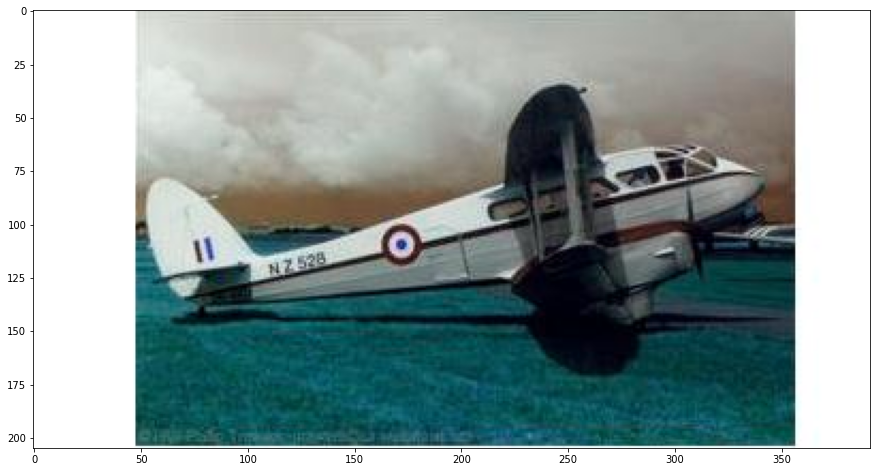

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(train_imgs[0])

## Feature Extraction

##SIFT 

SIFT is a technique for detecting salient, stable feature points in an image. 

For every such point, it also provides a set of **“features”** that **“characterize/describe”** a
small image region around the point. 

These features are **invariant to rotation and scale.**

###Basic steps of SIFT algorithm: (Overview)
* Determine approximate location and scale of salient feature points (also called keypoints)
* Refine their location and scale
* Determine orientation(s) for each keypoint.
* Determine descriptors for each keypoint.



*The* steps to get a 128 D SIFT  descriptors for each key point:

* Region rescaled to a grid of 16x16 pixels.

* 4x4 regions = 16 histograms (concatenated).

* Histograms: 8 orientation bins, gradients weighted by gradient magnitude.

* The Final descriptor has 128 dimensions and is normalized to compensate for illumination differences

More details on SIFT can be found [here.](https://courses.cs.washington.edu/courses/cse576/06sp/notes/Interest2.pdf)

In [ ]:
gray = cv2.cvtColor(train_imgs[0], cv2.COLOR_BGR2GRAY) #Changing the training images to grayscale
sift = cv2.xfeatures2d.SIFT_create() #Defining SIFT operator
kp, des = sift.detectAndCompute(gray, None) #Applying SIFT operator on the training images
#Getting keypoints from SIFT applied one of the training images. Here, 0th image of training images
img=0
kp_img = cv2.drawKeypoints(gray,kp,img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 

###Visualizing one of the the SIFT applied training images

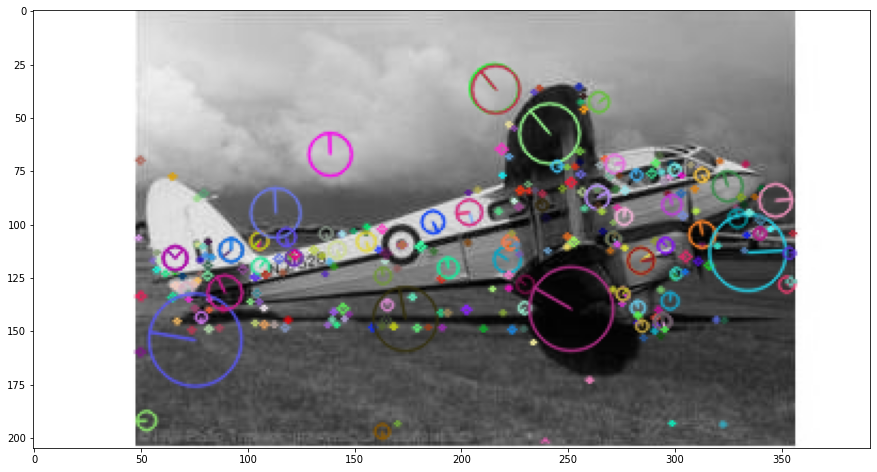

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(kp_img)

###Defining the function for getting SIFT feature descriptors of the image

In [ ]:
def get_sift_feature_descriptors(jpg_img):
    img = jpg_img
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    kp, des = sift.detectAndCompute(gray, None)
    return des

## Dictionary Building:

###Defining the function for generating vocabulary of the given image list

#### Given a list of images, it generates of vocabulary which contains descriptors of all the images present in the img_list.

#### Parameters:

img_list - list containing all the images.

#### Returns:

(vocab_list, temp_list)
temp_list - list, where each element of the list is a numpy array containing all the feature descriptors of the patches present in an image.

#### For example, 
[1].shape == (x, 128)

vocab_list: a numpy array, which contains all the 
descriptors present in all the images.

vocab_list.shape == (x, 128)

where x is the total no of descriptors
present in the images.

128- size of descriptor.   

In [ ]:
def generate_vocabulary(img_list):
    temp_list = []
    #flag = True
    for img in img_list:
        features = get_sift_feature_descriptors(img)
        temp_list.append(features)

    vocab_list = temp_list[0]

    for ftr in range(1, len(temp_list)):
        vocab_list = np.vstack((vocab_list, temp_list[ftr]))
        
    vocabulary = vocab_list
    return (vocab_list, temp_list)

In [ ]:
(f_vocabulary, i_vocab)= generate_vocabulary(train_imgs)
(t_f_vocabulary, t_i_vocab)= generate_vocabulary(test_imgs)

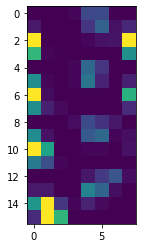

In [ ]:
plt.imshow(f_vocabulary[10].reshape(16,8))

#### Given vocabulary, and number of clusters in which vocabulary is to be divided, applies kmeans algorithm and returns 

#### Parameters:
                    vocab - vocabulary containing feature descriptors
                    from all the images available for training.

                    n_clusters - Number of clusters for dividing vocab.
#### Returns:
                    kmeans - which is further used to predict.

## Coding:

###Defining a function to generate clusters

In [ ]:
def generate_clusters(vocab, n_clusters = 500):
    kmeans = KMeans(n_clusters).fit(vocab)
    return kmeans

In [ ]:
n_clusters = 1000

**Note: This will take quite some time**

In [ ]:
kmeans = generate_clusters(f_vocabulary, n_clusters)

## Pooling

In [ ]:
def generate_features(temp_list, kmeans, n_clusters):
    """
        given cluster centres(via kmeans) which are obtained from
        all the training images, what this function does is,
        for each image it creates a histogram where x axis is 
        nothing but all the clusters(0 to n_clusters) and
        for each descriptor of the image we calculate to which
        cluster it belongs and for each cluster y-axis contains
        no of times a cluster is predicted via kmeans.predict(descriptor).

        This can be further used for training classifier.

        Parameters:
                    temp_list = is the same temp_list from 
                                generate_vocabulary.
                    n_clusters = no of clusters in which training 
                                vocab is divided into.
                    kmeans = kmeans obtained from generate_clusters.

        Returns:
                    p_array - a numpy array which is of size
                              no_images x no_of_clusters.
    """
                    
    t_length = len(temp_list)
    p_array = np.zeros((1,n_clusters))

    for i in range(0, t_length):

        features = temp_list[i]
        (x1, y1) = features.shape

        t_array = np.zeros((1, n_clusters)) #an array for each image

        for j in range(0, x1):
            des = features[j]
            des = des.reshape(1, 128)
            ind = kmeans.predict(des)
            t_array[0][ind] += 1

        p_array = np.vstack((p_array, t_array))
    
    p_array = p_array[1:]
    return p_array

In [ ]:
train_data = generate_features(i_vocab, kmeans, n_clusters)
test_data =  generate_features(t_i_vocab, kmeans, n_clusters)

## Classification

In [ ]:
print("Applying SVM classifier.")
# SVM Classifier.
clf = svm.SVC()
fitted = clf.fit(train_data, train_labels)
predict = clf.predict(test_data)

Applying SVM classifier.


In [ ]:
print("Actual:")
print(test_labels)
print("predicted:")
print(predict)

Actual:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
predicted:
[0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 3 0 1 1 1 1 0 1 2 1 1 1 2 1 1 1 1 3 3
 1 1 1 2 2 2 0 2 2 4 2 2 2 2 2 2 0 2 1 2 2 2 2 3 3 3 3 3 3 1 3 3 1 5 5 5 5
 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 2 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


##Calculating Confusion matrix

In [ ]:
#Confusion matrix.
test_labels = np.asarray(test_labels)
cnf_matrix = confusion_matrix(predict, test_labels)
np.set_printoptions(precision = 2)

##Visualizing Confusion matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[17  1  2  0  0  0]
 [ 0 15  1  2  0  0]
 [ 0  2 16  0  0  2]
 [ 3  2  0  8  0  0]
 [ 0  0  1  0  1  1]
 [ 0  0  0  0 18 17]]


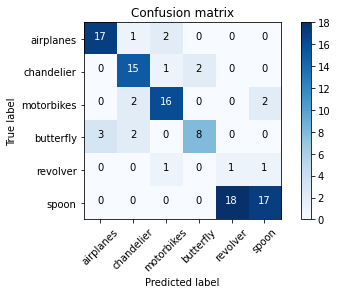

In [ ]:
plot_confusion_matrix(cnf_matrix, classes = categories,
                                title='Confusion matrix')
plt.show()

## Please answer the questions below to complete the experiment:

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "no" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]

In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 9197
Date of submission:  07 Nov 2020
Time of submission:  12:14:25
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
